# Q.11

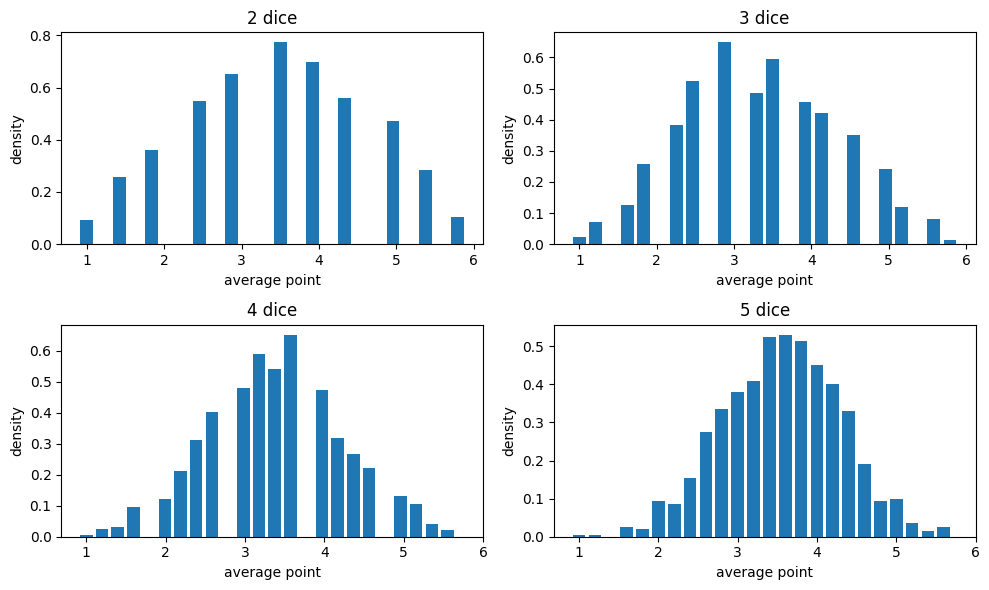

In [2]:
import matplotlib.pyplot as plt
import random
random.seed(88)
%matplotlib inline

dice = [1, 2, 3, 4, 5, 6]
amounts = [2, 3, 4, 5]
f = plt.figure(figsize=(10, 6))

def dice_avg_plot(n, dice):
     for i, amount in enumerate(amounts, start=1):
        points = []
        for j in range(n):
            point = random.choices(dice, k=amount)
            points.append(sum(point)/amount) 
        f.add_subplot(2,2,i)
        plt.hist(points, bins=24, density=True, rwidth=0.8 ,align='left')
        plt.xlabel('average point')
        plt.ylabel('density')
        plt.title(f"{amount} dice")   
        plt.xticks(dice)
     plt.tight_layout()
        
dice_avg_plot(1000,dice)

# Q.12.a

In [3]:
class card:
    def __init__(self, suit, point):
        self.suit = suit
        self.point = point    
        if point in ['J','Q','K']: #人頭點數為5
            self.value = 5
        elif point == 'A': #Ace點數為1
            self.value = 1
        else: 
            self.value = int(point)   
    def __repr__(self):    
        return f'{self.suit}{self.point}'

suits = ['c','s','d','h']  #c=club, s=space, d=diamond, h=heart
points = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']

cards = [card(suit, point) for suit in suits for point in points] 

#建立kruskal count game 並回傳前10張牌所抵達的終點
def kruskal_count_game(cards): 
    cards10 = cards[:10]   
    end = set()  
    for card in cards10:
        clist = []  #建立清單紀錄停留過的牌      
        step_count = int(cards.index(card))
        clist.append(cards[step_count])  #紀錄第一張牌的位置     
        while True:
            try:
                step_count += cards[step_count].value  #依照牌面代表的點數增加步數
                clist.append(cards[step_count])
            except: 
                break   #當step_count超過52會顯示錯誤，此時終止迴圈        
        end.add(clist[-1]) 
    return end 

#計算第一排全數抵達同樣終點之機率
def simulate(n):
    same = 0    
    for n in range(n):
        random.shuffle(cards)    
        final_card = kruskal_count_game(cards)    
        if len(final_card) == 1:  #檢視是否前10張都抵達一樣的終點
            same += 1            
    same_rate = same/n    
    return same_rate        
        
print("The probability that all the first 10 cards reach the same end is estimated to be " + f"{simulate(10000):.3%}")


The probability that all the first 10 cards reach the same end is estimated to be 58.246%


# Q.12.b

In [9]:
for n in [1,2]:
    for i in [1,3,5,7,9]:
        class card:
            def __init__(self, suit, point):
                self.suit = suit
                self.point = point    
                if point in ['J','Q','K']: 
                    self.value = i
                elif point == 'A': 
                    self.value = 1
                else: 
                    self.value = int(point)   
            def __repr__(self):    
                return f'{self.suit}{self.point}'    
        cards = [card(suit, point) for suit in suits for point in points]*n
        print("face card point is " + str(i) + ' and ' + str(52*n) + ' cards' + ': ' + f"{simulate(10000):.3%}")


face card point is 1 and 52 cards: 82.058%
face card point is 3 and 52 cards: 70.737%
face card point is 5 and 52 cards: 59.136%
face card point is 7 and 52 cards: 46.325%
face card point is 9 and 52 cards: 33.673%
face card point is 1 and 104 cards: 99.040%
face card point is 3 and 104 cards: 97.170%
face card point is 5 and 104 cards: 93.899%
face card point is 7 and 104 cards: 89.079%
face card point is 9 and 104 cards: 81.678%
